# 16-7-24      : Practical 3.4.2 - Data Visualization Using Seaborn 

**J008**

**Faraz**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from warnings import filterwarnings

In [3]:
df=sns.load_dataset('taxis')
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [4]:
df.shape

(6433, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [7]:
df['pickup_borough'].unique()

array(['Manhattan', 'Queens', nan, 'Bronx', 'Brooklyn'], dtype=object)

In [8]:
df['dropoff_borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', nan, 'Bronx', 'Staten Island'],
      dtype=object)

In [9]:
df['passengers'].unique()

array([1, 3, 0, 6, 5, 2, 4], dtype=int64)

In [12]:
df['color'].unique()

array(['yellow', 'green'], dtype=object)

In [13]:
df['payment'].unique()

array(['credit card', 'cash', nan], dtype=object)

In [36]:
df['tolls'].unique()

array([ 0.  ,  5.76, 12.5 ,  5.54,  8.4 , 17.28,  6.12,  2.64, 16.26,
        9.5 , 11.52,  5.75, 24.02,  8.5 , 18.9 ,  4.75])

In [15]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

#### (a)


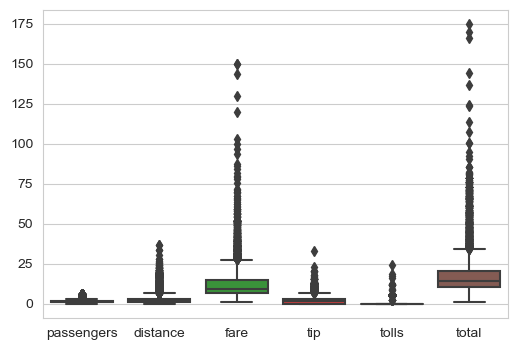

In [31]:
fig=plt.figure(figsize=(6,4))
sns.boxplot(data=df, orient='v')
plt.show()

Above graph indicates that many outliers are present in all continuous variables.

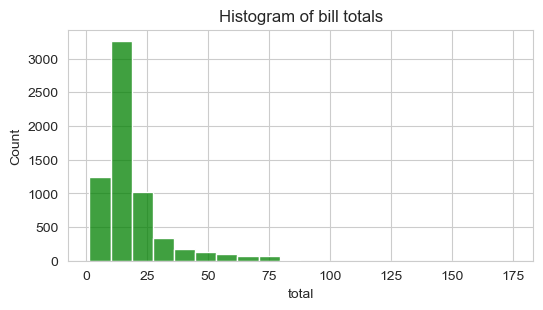

In [27]:
fig=plt.figure(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(df['total'],kde=False,color='green',bins=20)
plt.title("Histogram of bill totals")
plt.show()

Above graph indicates that maximum of the order totals lie between $0-$25.

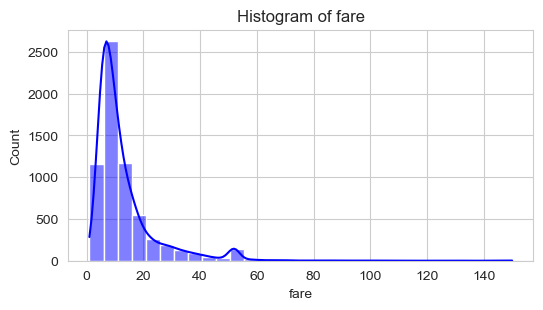

In [26]:
fig=plt.figure(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(df['fare'],kde=True,color='blue',bins=30)
plt.title("Histogram of fare")
plt.show()

Above graph shows the distribution of fares. 

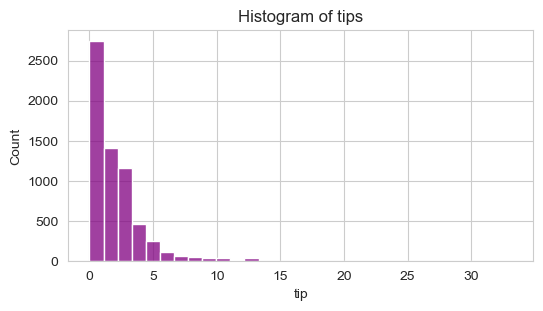

In [25]:
fig=plt.figure(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(df['tip'],kde=False,color='purple',bins=30)
plt.title("Histogram of tips")
plt.show()

Above graph shows that maximum of the tips recieved are between $0-$4. 

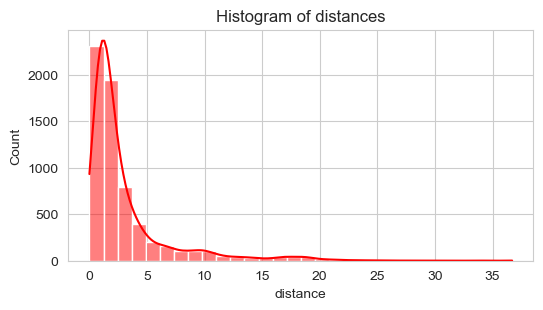

In [24]:
fig=plt.figure(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(df['distance'],kde=True,color='red',bins=30)
plt.title("Histogram of distances")
plt.show()

Above graph shows that maximum of the distances covered are between 0-3 kms. 

#### b) 

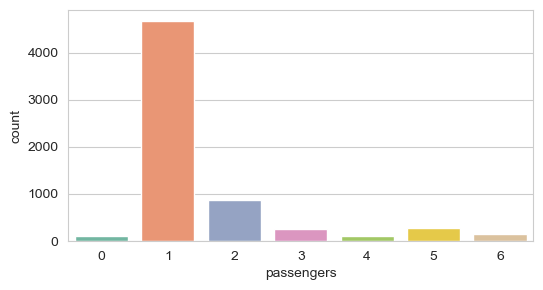

In [71]:
fig=plt.figure(figsize=(6,3))
sns.countplot(x='passengers',data=df,palette='Set2')
plt.show()

Above graph shows that the count of passengers being 1 is the maximum. 

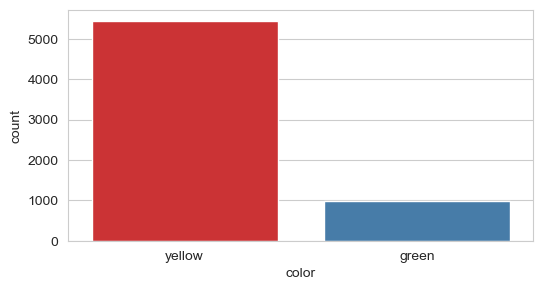

In [70]:
fig=plt.figure(figsize=(6,3))
sns.countplot(x='color',data=df,palette='Set1')
plt.show()

Above graph shows the distribution of the taxi colours.

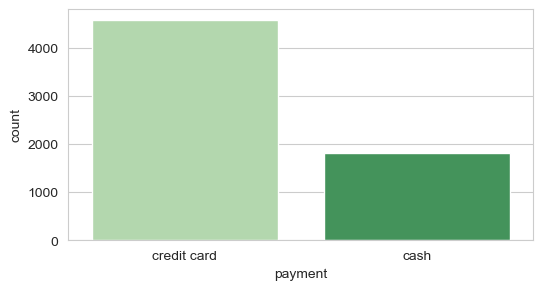

In [69]:
fig=plt.figure(figsize=(6,3))
sns.countplot(x='payment',data=df,palette='Greens')
plt.show()

Above graph shows the distribution of payment modes.

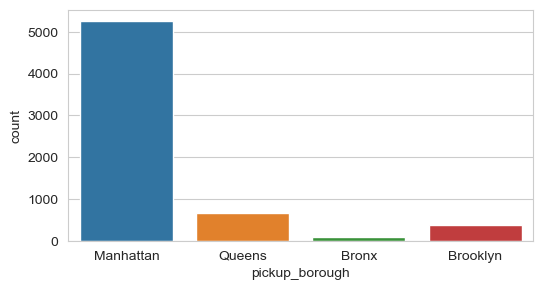

In [68]:
fig=plt.figure(figsize=(6,3))
sns.countplot(x='pickup_borough',data=df)
plt.show()

Above graph shows that maximum of the passengers are being picked up from Manhattan. 

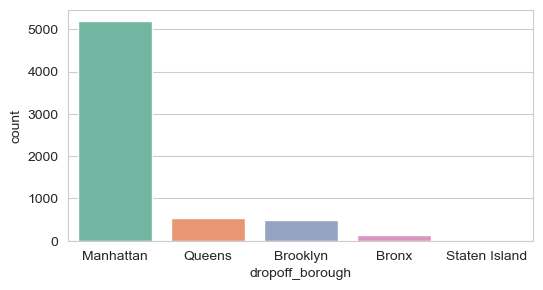

In [67]:
fig=plt.figure(figsize=(6,3))
sns.countplot(x='dropoff_borough',data=df,palette='Set2')
plt.show()

Above graph shows that maximum of the passengers are being dropped off at Manhattan. 

#### c) 

<Figure size 600x400 with 0 Axes>

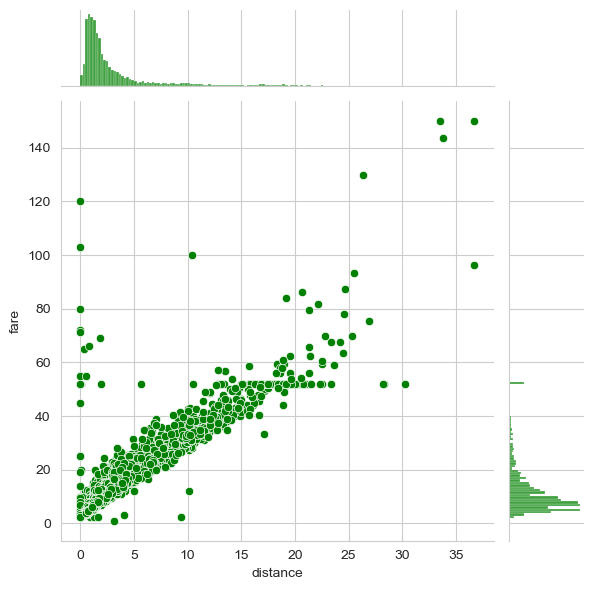

In [38]:
fig=plt.figure(figsize=(6,4))
sns.jointplot(x='distance',y='fare',color='green',data=df)
plt.show()

Above graph shows that there exists a linear relationship between distance and fare. 

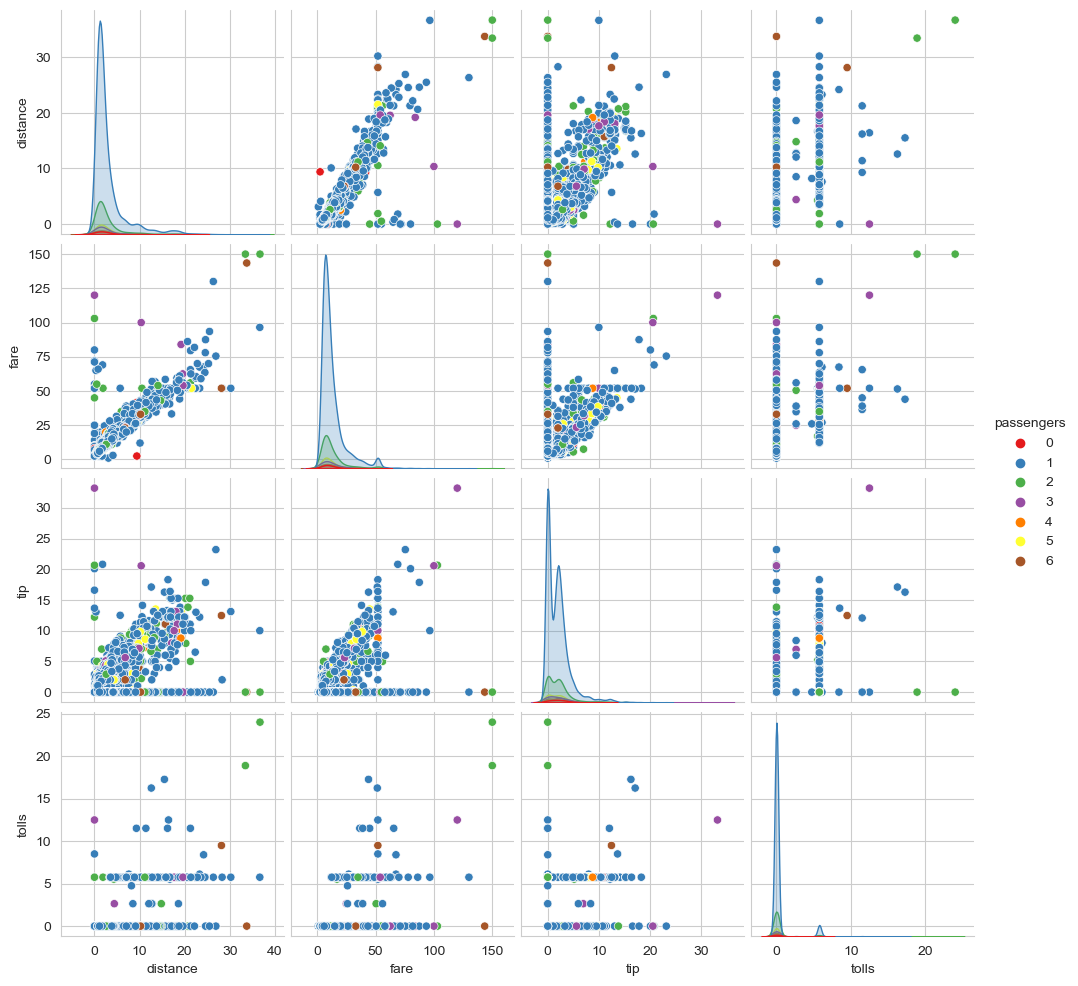

In [80]:
cols=['distance','fare','tip','tolls','passengers']
df_subset=df[cols]
sns.pairplot(df_subset,hue='passengers',palette='Set1')
plt.show()

Above pairplot gives us scatter plots for all continuous variables and kernel density plots for variables with themselves.

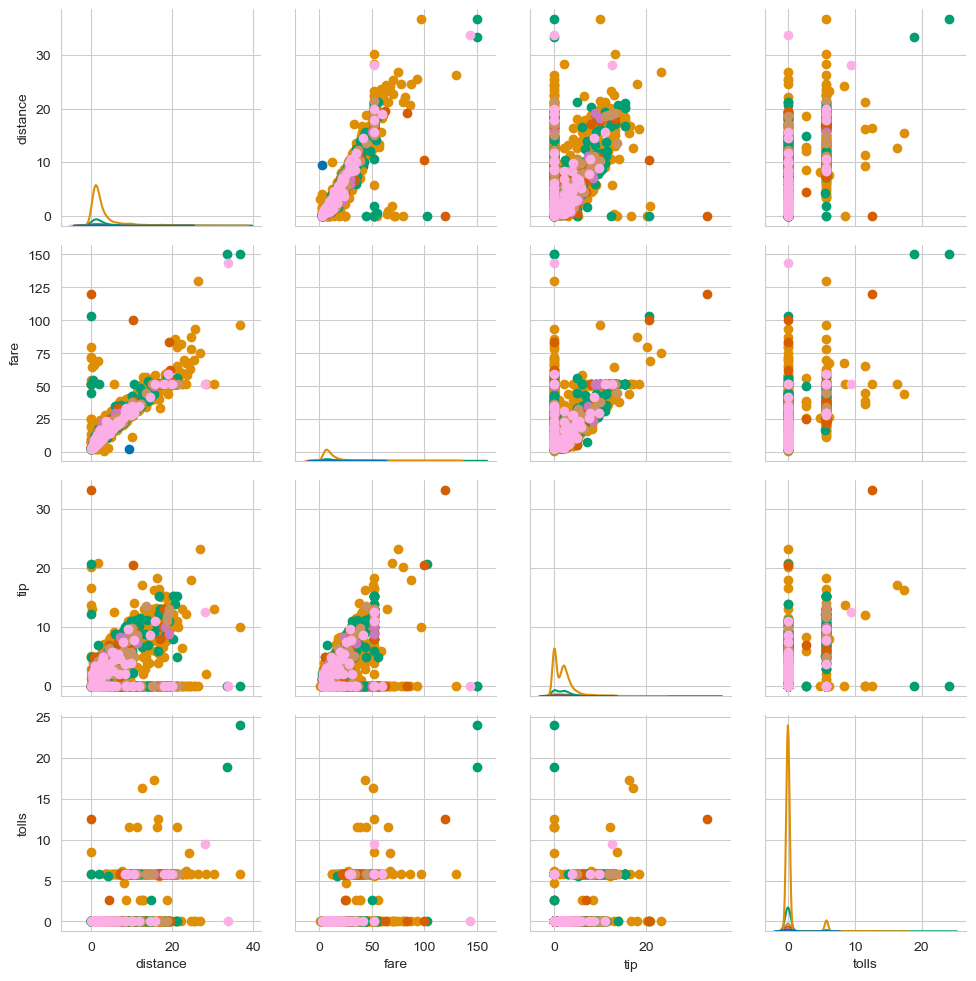

In [86]:
g=sns.PairGrid(df_subset,hue='passengers',palette='colorblind')
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter)
plt.show()

Above pairgrid gives us plots for all continuous variables, with the number of passengers taken as hue. 

#### d)

<Figure size 200x600 with 0 Axes>

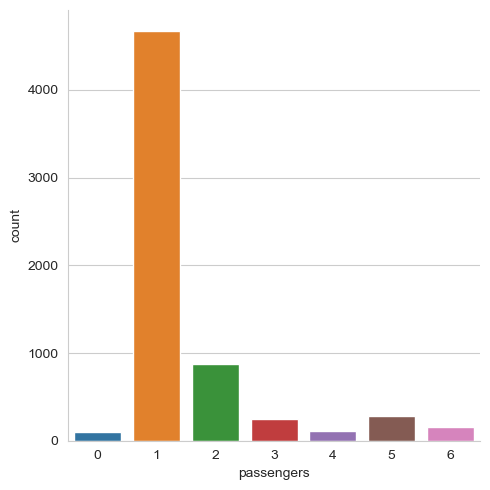

In [43]:
sns.catplot(x='passengers',kind='count',data=df)
plt.show()

Above graph shows that the count of passengers being 1 is the maximum.

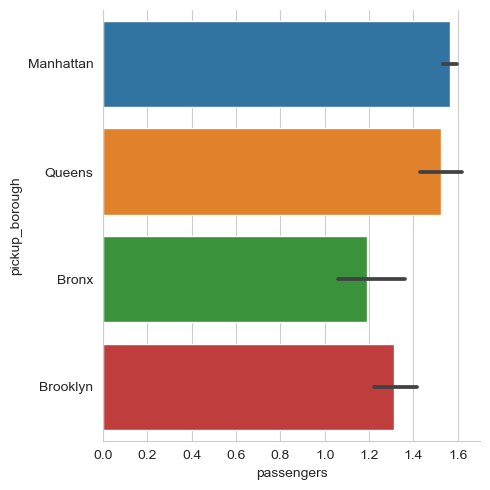

In [45]:
sns.catplot(y='pickup_borough',x='passengers',kind='bar',estimator=np.mean,data=df)
plt.show()

Above graph shows that maximum of the passengers are being picked up from Manhattan. 

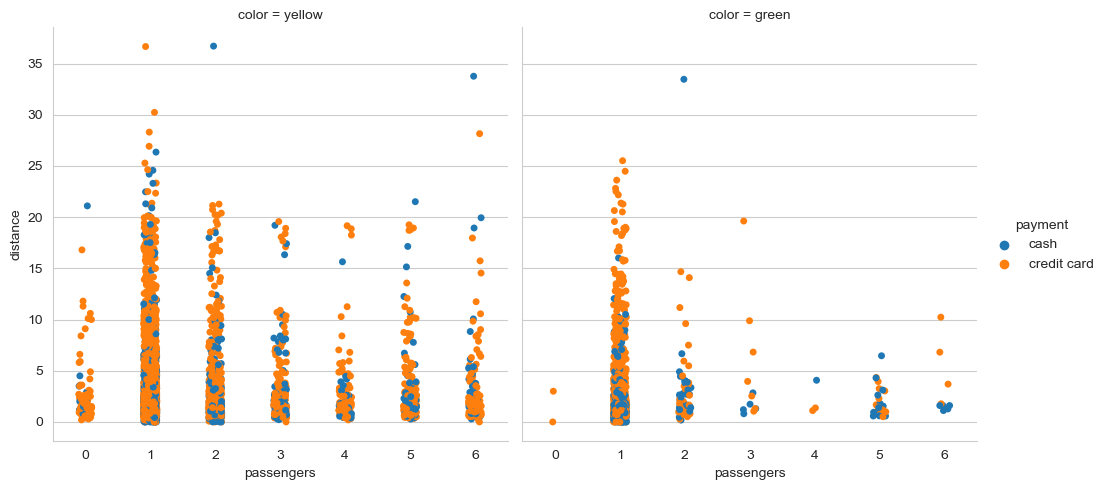

In [108]:
sns.catplot(x='passengers',y='distance',hue='payment',col='color',data=df)
plt.show()

Above is a plot which shows the distance passengers are travelling, with their payment mode as hue and their taxi color being the seperator for the plots.

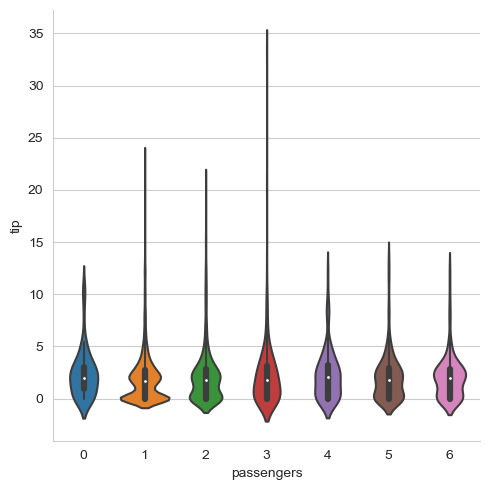

In [46]:
sns.catplot(y='tip',x='passengers',kind='violin',data=df)
plt.show()

Violinplot above shows a combination of histograms and kernel density plots for passengers v/s the tips recieved. 

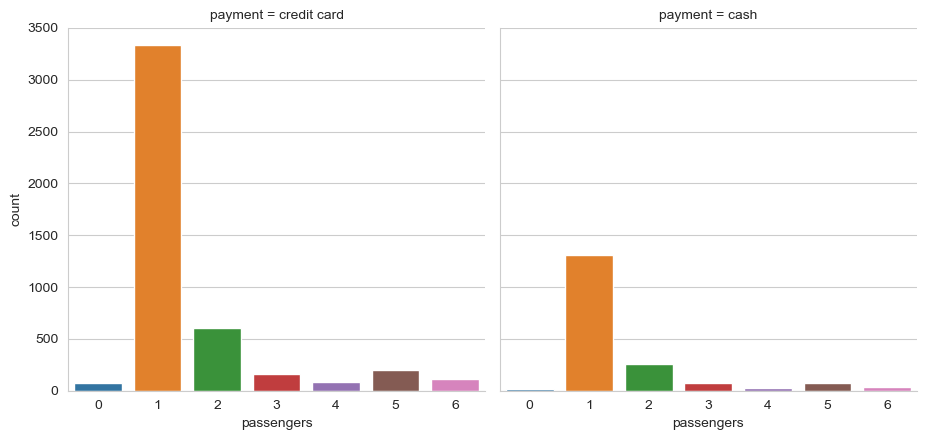

In [47]:
sns.catplot(x='passengers',
           col='payment',
           col_wrap=4,
           data=df,
           kind='count',
           height=4.5,
           aspect=1)

Above is a plot for bar charts of passengers seperated by the mode of payment. 

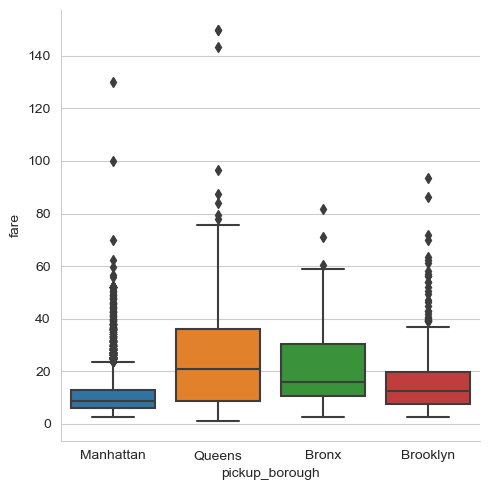

In [119]:
sns.catplot(x='pickup_borough',
           y='fare',
           data=df,
           kind='box')
plt.show()

Above is a plot that shows boxplots for all the pickup spots v/s the fare. 

#### e)

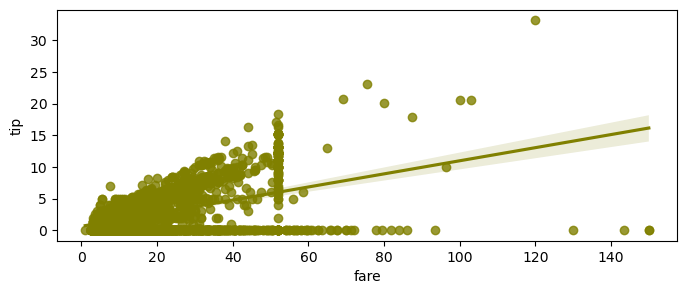

In [10]:
fig=plt.figure(figsize=(8,3))
sns.regplot(x='fare',y='tip',color='olive',data=df)
plt.show()

Graph above shows a regression plot with regression line for the fare v/s the tip. 

### f) 

C:\Users\masir\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


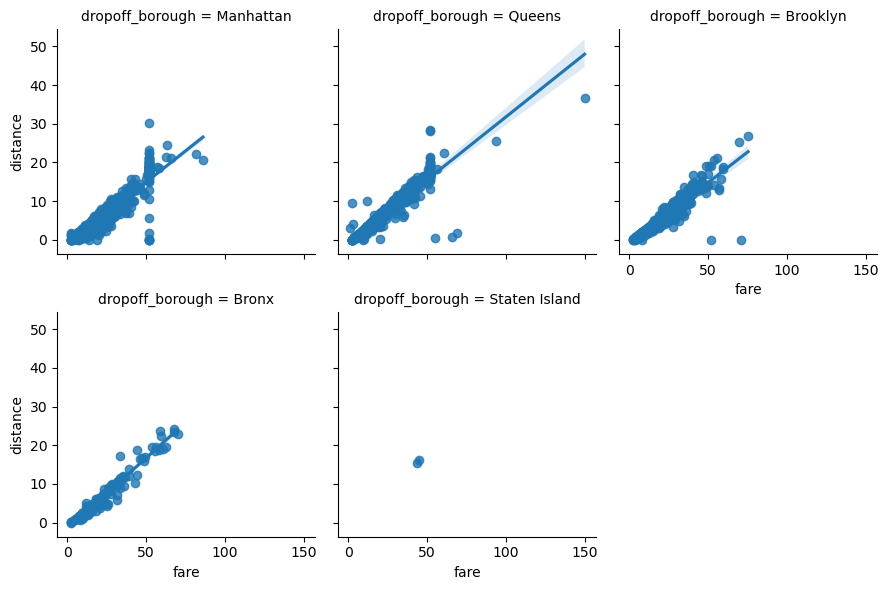

In [6]:
g = sns.FacetGrid(df, col='dropoff_borough', col_wrap=3, height=3)
g.map(sns.regplot, 'fare', 'distance')
plt.show()

Above is a grid of plots that show the relation between fare and distance for each dropoff borough. 

### g)

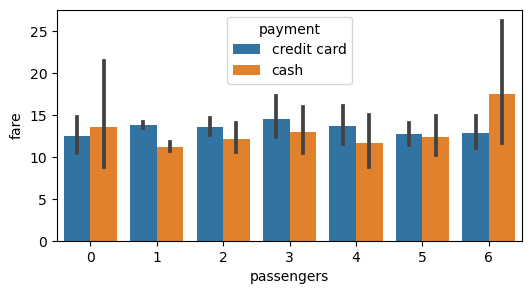

In [7]:
fig=plt.figure(figsize=(6,3))
sns.barplot(x='passengers',y='fare',hue='payment',data=df)
plt.show()

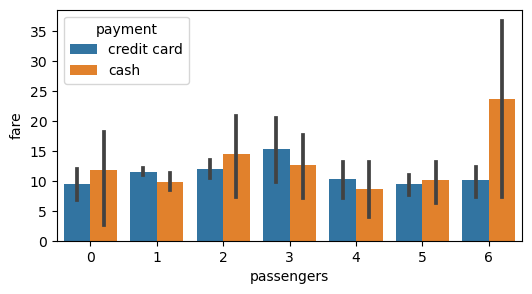

In [8]:
fig=plt.figure(figsize=(6,3))
sns.barplot(x='passengers',y='fare',hue='payment',data=df,estimator=np.std)
plt.show()

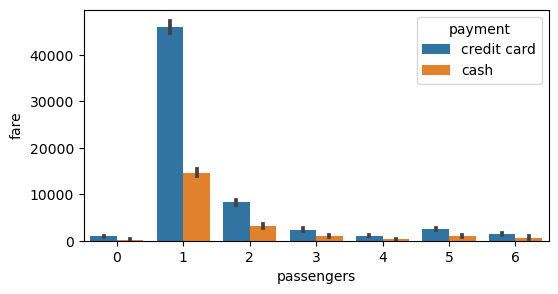

In [9]:
fig=plt.figure(figsize=(6,3))
sns.barplot(x='passengers',y='fare',hue='payment',data=df,estimator=np.sum)
plt.show()

Above graphs represent the fares for different number of passengers taken with mean, standard deviation and counts.